In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#healthall = pd.read_csv('HHC_SOCRATA_PRVDR.csv')
health_data = pd.read_csv('../data/Original_merged.csv', encoding = "ISO-8859-1")

##### Source of code: 
# https://www.kaggle.com/nirajvermafcb/d/cms/hospital-general-information/detail-analysis-of-various-hospital-factors

In [2]:
health_data.head()
#list(health_data.columns.values)

,State,CMS Certification Number (CCN),Provider Name,Address,City,Zip,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,...,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family"
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES,"201 MONROE STREET, THE RSA TOWER, SUITE 1200",MONTGOMERY,36104,Government - State/ County,Yes,Yes,Yes,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,AL,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,35020,Government - State/ County,Yes,Yes,Yes,...,4,4,90,4,88,3,84,5,92,76
2,AL,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,35216,Proprietary,Yes,Yes,Yes,...,5,5,91,5,89,4,89,4,90,82
3,AL,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,36330,Proprietary,Yes,Yes,Yes,...,5,5,93,5,92,5,91,4,93,90
4,AL,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,35031,Proprietary,Yes,Yes,Yes,...,4,4,88,5,87,3,85,4,84,81


In [3]:
# Check missing values per column
def num_missing(x):
    return sum(x.isnull())

# Applying per column; 
print ("Missing values per column:")
print (health_data.apply(num_missing, axis=0) )#axis=0 defines that function is to be applied on each column

Missing values per column:
State                                                                                                                                                            0
CMS Certification Number (CCN)                                                                                                                                   0
Provider Name                                                                                                                                                    0
Address                                                                                                                                                          0
City                                                                                                                                                             0
Zip                                                                                                                                                           

In [67]:
# Drop the certification column
#health_data.drop('CMS Certification Number (CCN)', axis = 1, inplace = 'True')

In [4]:
health_data.shape

(12058, 42)

In [69]:
# Check the mean, std, min, max of data
health_data.describe()

/Users/weiyihuang/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMS Certification Number (CCN),Zip,Quality of patient care star rating,How often the home health team began their patientsÕ care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team checked patientsÕ risk of falling,How often the home health team checked patients for depression,How often the home health team determined whether patients received a flu shot for the currnet flu season,How often the home health team made sure that their patients have received a pneumococcal vaccine (pneumonia shot),"With diabetes, how often the home health team got doctorÕs orders, gave foot care, and taught patients about foot care",How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients had less pain when moving around,How often patientsÕ breathing improved,How often patientsÕ wounds improved or healed after an operation,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted"
count,12058.000000,12058.000000,9220.000000,9989.000000,9974.000000,9769.000000,9971.000000,9591.000000,9940.000000,8777.000000,9179.000000,9062.000000,9219.000000,9118.000000,8910.000000,4349.000000,8921.000000,8637.000000,8637.000000
mean,324415.102173,57877.591143,3.249403,91.577425,95.171235,99.093213,96.767486,68.157450,71.250382,95.768828,65.731627,61.149150,68.577709,68.865387,65.276038,90.709335,54.159119,15.835811,12.434306
std,225784.124809,25575.432444,0.866902,8.587044,8.438959,3.090704,8.155422,20.403027,23.369372,7.918299,13.431679,15.031519,15.303443,18.003715,18.986623,7.351551,15.262951,4.172260,4.274491
min,17000.000000,601.000000,1.000000,18.500000,0.000000,2.100000,0.000000,0.000000,0.000000,11.800000,2.100000,0.000000,0.000000,0.000000,0.000000,23.100000,0.000000,0.000000,0.000000
25%,117065.500000,35901.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,267621.500000,60603.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,459037.750000,77494.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,747982.000000,99901.000000,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.700000,38.200000


In [5]:
# Find unique values of state
unique_health_ownership=health_data['Type of Ownership'].unique()
unique_health_ownership

array(['Government - State/ County', 'Proprietary', 'Non - Profit Private',
       'Non - Profit Religious', 'Non - Profit Other',
       'Government - Local',
       'Government - Combination Government & Voluntary'], dtype=object)

In [6]:
# Dummy variable: 
# get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified.
dummy_data = pd.get_dummies(health_data['Type of Ownership'])
dummy_data.head()

,Government - Combination Government & Voluntary,Government - Local,Government - State/ County,Non - Profit Other,Non - Profit Private,Non - Profit Religious,Proprietary
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Count the number of values within a category
a=dummy_data['Government - Combination Government & Voluntary'].sum()
b=dummy_data['Government - Local'].sum()
c=dummy_data['Government - State/ County'].sum()
d=dummy_data['Non - Profit Other'].sum()
e=dummy_data['Non - Profit Private'].sum()
f=dummy_data['Non - Profit Religious'].sum()
g=dummy_data['Proprietary'].sum()
list = [a,b,c,d,e,f,g]
list

[13.0, 176.0, 368.0, 590.0, 858.0, 369.0, 9684.0]

[<matplotlib.text.Text at 0x116496b70>, <matplotlib.text.Text at 0x1150b42b0>]

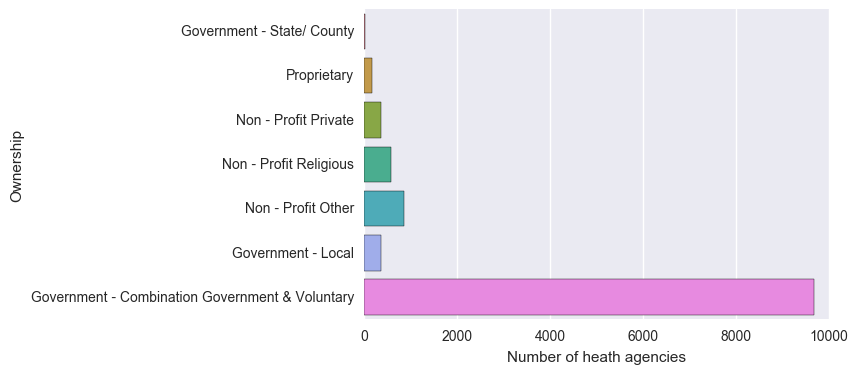

In [11]:
# Plot the number of health agencies vs the ownership
ax = sns.barplot(y = unique_health_ownership, x = list, data = health_data)
ax.set(xlabel = 'Number of heath agencies', ylabel = 'Ownership')

In [12]:
# Unique star rating
health_data['Quality of patient care star rating'].unique()

array([ nan,  4. ,  4.5,  5. ,  2. ,  3. ,  2.5,  3.5,  1.5,  1. ])

In [13]:
# Drop those rows where overall rating == nan
# Check the missing values in the rating column
health_data['Quality of patient care star rating'].isnull()

# Determine if any value in a column is missing
health_data['Quality of patient care star rating'].isnull().values.any()

# Count missing values in a column
health_data['Quality of patient care star rating'].isnull().sum()

# Count total missing values in a dataframe
health_data.isnull().sum().sum()

51723

In [14]:
health_data['Quality of patient care star rating'].isnull()

0         True
1        False
2        False
3        False
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
12028     True
12029     True
12030     True
12031     True
12032     True
12033     True
12034     True
12035     True
12036     True
12037     True
12038     True
12039     True
12040     True
12041     True
12042     True
12043     True
12044     True
12045     True
12046     True
12047     True
12048     True
12049     True
12050     True
12051     True
12052     True
12053     True
12054     True
12055     True
12056     True
12057     True
Name: Quality of patient care star rating, dtype: bool

In [15]:
health_data[health_data['HHCAHPS Survey Summary Star Rating'] == 'Not Available']

,State,CMS Certification Number (CCN),Provider Name,Address,City,Zip,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,...,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family"
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES,"201 MONROE STREET, THE RSA TOWER, SUITE 1200",MONTGOMERY,36104,Government - State/ County,Yes,Yes,Yes,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
6,AL,17017,SOUTHERN RURAL HEALTH CARE,508 ST CLAIR STREET SE,RUSSELLVILLE,35653,Non - Profit Private,Yes,Yes,Yes,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
36,AL,17079,LAMAR HOME CARE INC,"131 1ST AVENUE NW, SUITE B",VERNON,35592,Proprietary,Yes,Yes,No,...,Not Available,Not Available,97,Not Available,92,Not Available,77,Not Available,98,92
38,AL,17082,CV HOME HEALTH OF BIBB COUNTY,142 PIERSON AVENUE,CENTREVILLE,35042,Proprietary,Yes,Yes,No,...,Not Available,Not Available,89,Not Available,88,Not Available,81,Not Available,86,84
53,AL,17101,HEALTH NOW HOME HEALTH,751 DERBY DRIVE,YORK,36925,Proprietary,Yes,No,No,...,Not Available,Not Available,88,Not Available,86,Not Available,73,Not Available,91,87
54,AL,17102,ALABAMA HOMECARE,"607 WILSON AVENUE, SUITE 3",EUTAW,35462,Non - Profit Other,Yes,Yes,No,...,Not Available,Not Available,90,Not Available,85,Not Available,90,Not Available,87,87
76,AL,17135,COMMUNITY HOME CARE,1526 GILMER AVENUE,TALLASSEE,36078,Non - Profit Private,Yes,Yes,Yes,...,Not Available,Not Available,96,Not Available,95,Not Available,93,Not Available,96,83
79,AL,17139,ASSOCIATES HOME HEALTH SERVICES,102 WEST CONECUH AVE,UNION SPRINGS,36089,Proprietary,Yes,Yes,Yes,...,Not Available,Not Available,95,Not Available,89,Not Available,84,Not Available,94,88
105,AL,17169,CV HOME HEALTH SERVICES,17035 HWY 11 NORTH,VANCE,35490,Proprietary,Yes,Yes,Yes,...,Not Available,Not Available,88,Not Available,81,Not Available,85,Not Available,87,65
112,AL,17177,"SHOALS HOME SERVICES, LLC",1114 BRADSHAW DRIVE,FLORENCE,35630,Proprietary,Yes,Yes,Yes,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [16]:
# Drop the rows where summary star rating == Not Available
AvailableRating_data = health_data.drop(health_data[health_data['HHCAHPS Survey Summary Star Rating'] == 'Not Available'].index)

In [17]:
AvailableRating_data['HHCAHPS Survey Summary Star Rating'].unique()

array(['4', '5', '3', '2', '1'], dtype=object)

In [18]:
health_data['HHCAHPS Survey Summary Star Rating'].unique()

array(['Not Available', '4', '5', '3', '2', '1'], dtype=object)

In [19]:
# Sorting the values in Descending order as per the survey summary star rating
# of the health agencies
sorted_rating = AvailableRating_data.sort_values(['HHCAHPS Survey Summary Star Rating'], ascending = False)
sorted_rating['HHCAHPS Survey Summary Star Rating'].head()
sorted_rating[['Provider Name', 'HHCAHPS Survey Summary Star Rating']].head()

,Provider Name,HHCAHPS Survey Summary Star Rating
1762,VOLUNTEERS OF AMERICA HOME HEALTH OF WESTERN COLO,5
1908,BRISTOL HOSP HOME CARE AGENCY,5
8814,MAXIMACARE LLC,5
8825,ESSENTIAL HOME HEALTH,5
6076,LIVINGSTON HOME CARE AND HOSPICE,5


In [20]:
Unique_sorted_rating = sorted_rating['HHCAHPS Survey Summary Star Rating'].unique()
Unique_sorted_rating

array(['5', '4', '3', '2', '1'], dtype=object)

### Finding all the rows with rating 5,4,3,2,1 and separating them and keeping a count of those rows which belongs to that particular rating category

In [21]:
rating_with_5 = sorted_rating.loc[sorted_rating['HHCAHPS Survey Summary Star Rating'] == '5']
# Return series with number of non-NA records
rating_with_5.count()

Rating_5 = rating_with_5['CMS Certification Number (CCN)'].count()

rating_with_4 = sorted_rating.loc[sorted_rating['HHCAHPS Survey Summary Star Rating'] == '4']
Rating_4 = rating_with_4['CMS Certification Number (CCN)'].count()

rating_with_3 = sorted_rating.loc[sorted_rating['HHCAHPS Survey Summary Star Rating'] == '3']
Rating_3 = rating_with_3['CMS Certification Number (CCN)'].count()

rating_with_2 = sorted_rating.loc[sorted_rating['HHCAHPS Survey Summary Star Rating'] == '2']
Rating_2 = rating_with_2['CMS Certification Number (CCN)'].count()

rating_with_1 = sorted_rating.loc[sorted_rating['HHCAHPS Survey Summary Star Rating'] == '1']
Rating_1 = rating_with_1['CMS Certification Number (CCN)'].count()

list = [Rating_5, Rating_4, Rating_3, Rating_2, Rating_1]
list

[1007, 2399, 1740, 565, 79]

[<matplotlib.text.Text at 0x11635ba20>, <matplotlib.text.Text at 0x116445fd0>]

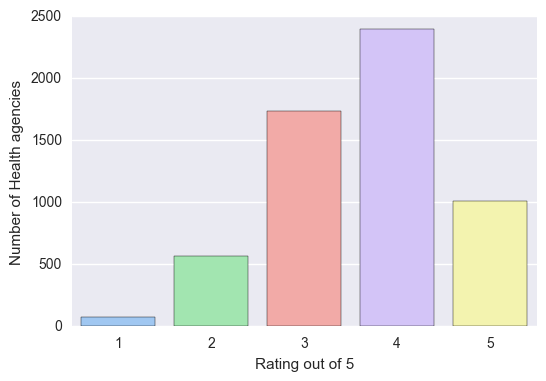

In [22]:
ax = sns.barplot(x = Unique_sorted_rating, y = list, data = health_data, palette = 'pastel')
ax.set(xlabel = 'Rating out of 5', ylabel = "Number of Health agencies")

# Which states has maximum number of 5 star rating health agencies?

In [23]:
Rating5_State = health_data.loc[(health_data['HHCAHPS Survey Summary Star Rating'] == '5'), ['State']]
Rating5_State.head()

,State
2,AL
3,AL
5,AL
19,AL
23,AL


In [24]:
State_count = Rating5_State['State'].value_counts()
index = State_count.index
values = State_count.values
values

array([180,  73,  59,  56,  46,  43,  39,  39,  38,  36,  33,  32,  28,
        28,  23,  23,  22,  22,  19,  19,  18,  13,  13,  11,  11,   8,
         8,   8,   7,   6,   6,   6,   5,   4,   3,   3,   3,   3,   2,
         2,   2,   2,   1,   1,   1,   1,   1])

[<matplotlib.text.Text at 0x11622a400>, <matplotlib.text.Text at 0x116362cf8>]

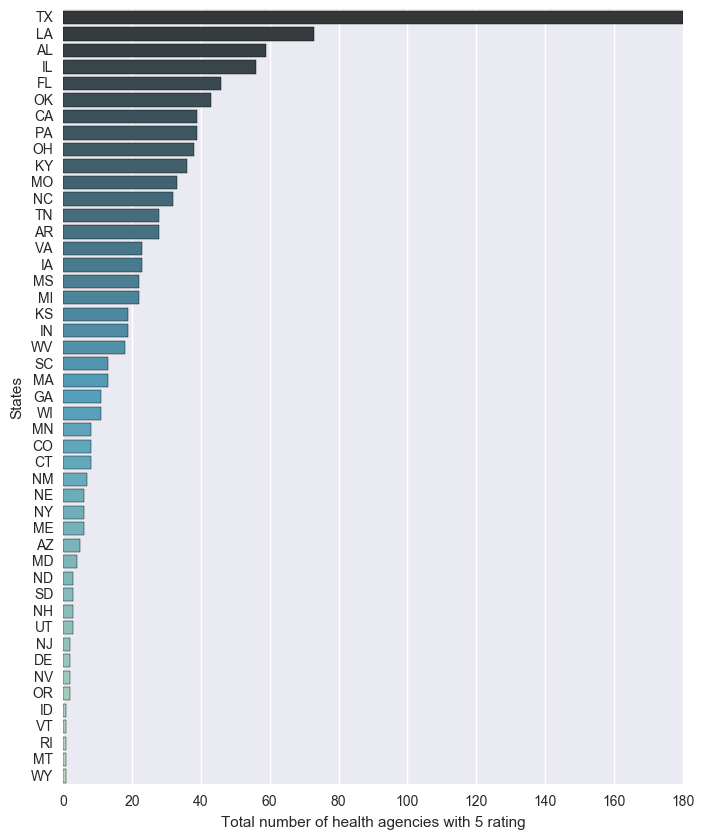

In [25]:
## Plot the state vs the number of health agencies with 5 star rating

# Adjust figure dimensions to make the label text more fit 
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='GnBu_d')
ax.set(xlabel='Total number of health agencies with 5 rating', ylabel='States')

## The average hospital rating, by state

In [26]:
AvailableRating_data['HHCAHPS Survey Summary Star Rating'].unique()

array(['4', '5', '3', '2', '1'], dtype=object)

### Converting it to float data type for calculation

In [27]:
AvailableRating_data['HHCAHPS Survey Summary Star Rating'] = AvailableRating_data['HHCAHPS Survey Summary Star Rating'].astype(float)

AvailableRating_data['HHCAHPS Survey Summary Star Rating'].mean()
AvailableRating_data['HHCAHPS Survey Summary Star Rating'].count()

5790

In [28]:
Statewise_average_rating = AvailableRating_data.groupby('State')['HHCAHPS Survey Summary Star Rating'].mean()

### Separating index and values

In [29]:
index = Statewise_average_rating.sort_values(ascending = False).index 
values = Statewise_average_rating.sort_values(ascending = False).values 

[<matplotlib.text.Text at 0x1194387b8>, <matplotlib.text.Text at 0x1194465f8>]

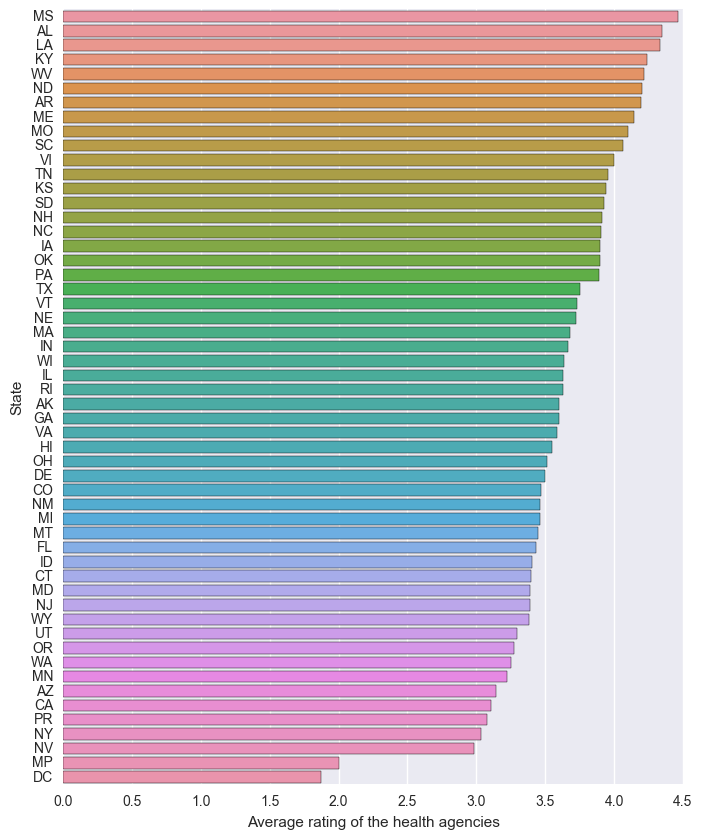

In [30]:
a4_dims = (8, 10)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(y = index, x = values)
ax.set(xlabel = 'Average rating of the health agencies', ylabel = 'State')